# What are the trends of the top performing Countries over the years?

### Importing Libraries
---------------------------


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Loading data
df = pd.read_pickle('FIFA_International_Results.pkl')

df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
1300,1930-07-13,Belgium,United States,0,3,FIFA World Cup,True
1301,1930-07-13,France,Mexico,4,1,FIFA World Cup,True
1302,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,True
1303,1930-07-14,Peru,Romania,1,3,FIFA World Cup,True
1304,1930-07-15,Argentina,France,1,0,FIFA World Cup,True


In [14]:
df['Winner'] = df.home_score > df.away_score
df.Winner[df.Winner == True] = df.home_team 
df.Winner[df.Winner == False] = df.away_team 
df.Winner[df.home_score == df.away_score] = "Draw"

df.head()

/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,home_team,away_team,home_score,away_score,tournament,neutral,Winner
1300,1930-07-13,Belgium,United States,0,3,FIFA World Cup,True,United States
1301,1930-07-13,France,Mexico,4,1,FIFA World Cup,True,France
1302,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,True,Yugoslavia
1303,1930-07-14,Peru,Romania,1,3,FIFA World Cup,True,Romania
1304,1930-07-15,Argentina,France,1,0,FIFA World Cup,True,Argentina


In [8]:
df = df[df.Winner != 'Draw']
#df.head()
df.shape

(6282, 8)

In [ ]:
df = df[df['tournament']]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

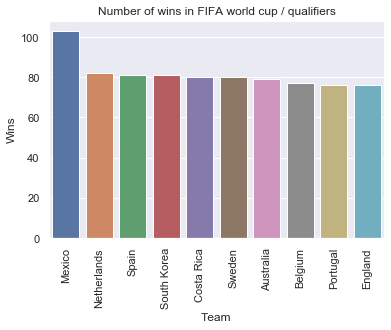

In [17]:
topWinners = df[df['tournament'] == 'FIFA World Cup qualification'].groupby('Winner')['tournament'].count().reset_index().sort_values('tournament', ascending = False).head(10)
a = sns.barplot(x = "Winner", y = "tournament", data = topWinners)
a.set_xlabel("Team")
a.set_ylabel("Wins")
a.set_title("Number of wins in FIFA world cup / qualifiers")
plt.xticks(rotation=90)